In [0]:
import numpy as np
import pandas as pd
import torch
import random
from google.colab import files

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
files.upload()

Saving dataset.zip to dataset.zip


In [0]:
import zipfile
z = zipfile.ZipFile('dataset.zip', 'r')
z.extractall()

In [0]:
!ls

dataset  dataset.zip  sample_data


## Датасет

In [0]:
from PIL import Image

data_train = []
data_test = []
for i in range(1,4001):
  if i % 10 == i:
    file_name = 'dataset/data/00000' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    data_train.append(np.asarray(im))
  elif i % 100 == i:
    file_name = 'dataset/data/0000' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    data_train.append(np.asarray(im))
  elif i % 1000 == i:
    file_name = 'dataset/data/000' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    data_train.append(np.asarray(im))
  elif i % 10000 == i:
    file_name = 'dataset/data/00' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    data_train.append(np.asarray(im))

for i in range(4001,5001):
  if i % 10000 == i:
    file_name = 'dataset/data/00' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    data_test.append(np.asarray(im))


data_y = pd.read_csv('dataset/list_attr_celeba.csv')
data_y = pd.DataFrame(data_y)
y_train = data_y[:4000]['Male']
y_train[y_train == -1] = 0
y_test = data_y[4000:5000]['Male']
y_test[y_test == -1] = 0
y_train = torch.LongTensor(y_train)
y_test.index = [i for i in range(1000)]
y_test = torch.LongTensor(y_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
X_train = torch.FloatTensor(data_train)
X_test = torch.FloatTensor(data_test)
X_train /= 255.
X_test /= 255.
X_train.shape
len(y_test), len(X_train), len(X_train), len(X_test)

(1000, 4000, 4000, 1000)

## Визуализация

tensor(0) tensor(0) tensor(1) tensor(0) tensor(0) tensor(0) tensor(1) tensor(1) tensor(0) tensor(0) 

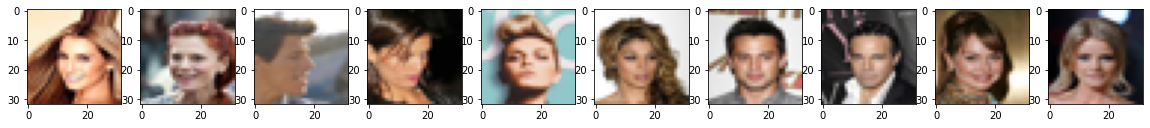

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [0]:
X_train = X_train.permute(0, 3, 1, 2) #Ставим на 2 место кол-во каналов
X_test = X_test.permute(0, 3, 1, 2)
X_train.shape 

torch.Size([4000, 3, 32, 32])

In [0]:
files.upload()

Saving test.zip to test.zip


{'test.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x95\x84\x8aP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00test/PK\x03\x04\x14\x00\x00\x00\x08\x00-FAO\xe0\xaeJ\x05r\x1c\x00\x00\xfa\x1c\x00\x00\x0f\x00\x00\x00test/059800.jpg\x9d\xd7e\\\x13\xee\xfb/\xf0\xc1h\tA\xbaq\xf4\x84/\x0c\x04\xc6\x18)5\x81I7\xd2\xdd)%e1\xc6\xe8\x10)\tG\x870\x1a\x05\x91.\xe9\x1a\x88\xd4\x08\tIA\x84\xff\xf7\xf7\x7f\x9dxr\x1e\x9cs>\xd7\xc3\xebz]\xaf\xfb\xfd\xba\xef\'\xf7\xed\xfc\xed*\xe0.BC[\x03@D\x04\x00\x10\xfd[\x80\xdb%\x80\x1a\x80\x82\x8c\x8c\x9c\x8c\x94\x82\x9c\x9c\x9c\x92\x92\x82\x8a\x9a\x91\x86\xfa\xce\x1dj6\x86{t\x8c\\\xec<\xdc\\\xec\x9c\x9c\xbc\xfc\xe2B\xbc\xf7\x1f\x8089\x85eE\x1eHHJKK\xf3\x08A\xe1r\x10\x05q)i\xc8\x7f\x96\x10QRRR\xdf\xa1f\xa5\xa1a\x85\xf0q\xf2A\xfe\x9fs\xdb\x05\xa0\xa7\x00,\x02>\x02\x89\xee\x03\x88\xe9\x89\x80\xf4D\xb7_\x01<\xff\x9e\x93\x94\xe8\xbf\x03\xf8\x1f!"\x06\x92\x90\x92\x91SPR\xdd\xf9w\x00w\x17@L\x04\x04\x12\x93\x00IIIH\xfe\xedF\xfe\xdb\x07\x90\xd0\x932\xf0I\xaa\x90\

In [0]:
import zipfile
z = zipfile.ZipFile('test.zip', 'r')
z.extractall()
!ls

dataset  dataset.zip  sample_data  test  test.zip


In [0]:
testing = []
for i in range(59800,59853):
  if i % 100000 == i:
    file_name = 'test/0' + str(i) + '.jpg' 
    im = Image.open(file_name)
    im = im.resize((32,32))
    testing.append(np.asarray(im))

testing = torch.FloatTensor(testing)
testing /= 255.
testing = testing.permute(0, 3, 1, 2)

In [0]:
def train(net, X_train, y_train, X_test, y_test, testing):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.003)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.5)

    batch_size = 300

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(40):
        scheduler.step()
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        net.eval()
        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data)#.cpu())

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data#.cpu()
        test_accuracy_history.append(accuracy)

        print(accuracy)

        testing = testing.to(device)
        pre = net.forward(testing)
        print(pre.argmax(dim=1))

    del net
    return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}

In [0]:
from torchvision.models import resnet18
accuracies['resnet18'], losses['resnet18'] = \
    train(resnet18(), X_train, y_train, X_test, y_test, testing)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


tensor(0.5810, device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], device='cuda:0')
tensor(0.7620, device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 0], device='cuda:0')
tensor(0.7990, device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 0], device='cuda:0')
tensor(0.8360, device='cuda:0')
tensor([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 0], device='cuda:0')
tensor(0.8220, device='cuda:0')
tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 0

Text(0.5, 1.0, 'Validation Accuracy')

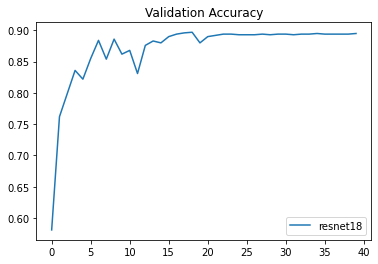

In [0]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy')

Text(0.5, 1.0, 'Validation Loss')

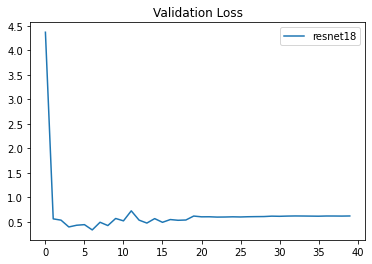

In [0]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss')